<a href="https://colab.research.google.com/github/TheAssis/AprendendoMachineLearning/blob/master/KmeansColors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Getting the data

import os
import tarfile
from six.moves import urllib
import csv

FILE_TO_DOWNLOAD =  "objetosECores.csv"
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rodolfostark/ColorSensorMachineLearning/"
DATA_PATH = "master/"
DATA_URL = DOWNLOAD_ROOT + DATA_PATH + FILE_TO_DOWNLOAD

def fetch_data(data_url=DATA_URL, data_path=DATA_PATH, file_to_download=FILE_TO_DOWNLOAD):
  if not os.path.isdir(data_path):
    os.makedirs(data_path)
  urllib.request.urlretrieve(data_url, data_path+file_to_download)
  
fetch_data()

# observando se o diretório datasets foi criado com sucesso 
# !ls dados


!ls master/

objetosECores.csv


In [3]:
#processo de leitura do arquivo de DADOS

leitura = csv.reader(open('master/objetosECores.csv','r'))
leitura = list(leitura) # tem que converter pra lista primeiro
leitura = np.array(leitura)# e depois converte pra array
#leitura2 = leitura.astype(int)
# sequencias de testes pra checar se o array foi gerado de forma correta
#print (leitura)
print("\n")
#print(leitura[0])
print("\n")
#print(leitura[0][0])

objetos_coloridos = leitura [1:,0:3] # objeto vermelho é o array apenas numérico
objetos_coloridos = objetos_coloridos.astype(float)
print(objetos_coloridos)
y = leitura [1:,3] # objeto vermelho é o array apenas numérico
y = y.astype(int)
print(y)
X = objetos_coloridos





[[ 76. 272.  48.]
 [ 68. 272.  48.]
 [ 76. 264.  48.]
 [ 75. 258.  48.]
 [ 76. 273.  48.]
 [ 76. 273.  48.]
 [ 76. 273.  48.]
 [ 76. 274.  48.]
 [ 76. 266.  48.]
 [ 72. 281.  43.]
 [ 78. 276.  49.]
 [ 78. 267.  49.]
 [ 78. 274.  49.]
 [ 78. 281.  49.]
 [ 78. 282.  49.]
 [ 78. 282.  50.]
 [ 78. 276.  50.]
 [ 78. 282.  49.]
 [126.  67.  23.]
 [127.  60.  23.]
 [121.  68.  22.]
 [127.  68.  23.]
 [127.  64.  23.]
 [119.  68.  22.]
 [127.  68.  22.]
 [121.  67.  22.]
 [126.  67.  22.]
 [122.  67.  22.]
 [122.  59.  22.]
 [122.  67.  22.]
 [116.  67.  22.]
 [114.  67.  22.]
 [122.  67.  22.]
 [122.  67.  22.]
 [122.  67.  22.]
 [122.  67.  22.]
 [157. 154.  39.]
 [157. 154.  39.]
 [151. 154.  39.]
 [158. 148.  39.]
 [158. 154.  39.]
 [158. 155.  39.]
 [151. 148.  39.]
 [158. 154.  39.]
 [157. 155.  39.]
 [158. 155.  40.]
 [152. 155.  39.]
 [159. 149.  39.]
 [158. 156.  39.]
 [159. 156.  39.]
 [159. 156.  39.]
 [159. 156.  39.]
 [158. 156.  39.]
 [153. 156.  39.]]
[-1 -1 -1 -1 -1 -1 -1 -

In [0]:
# Fitting K-Means to the dataset

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, init = 'random', random_state = 1)
y_kmeans = kmeans.fit_predict(X)

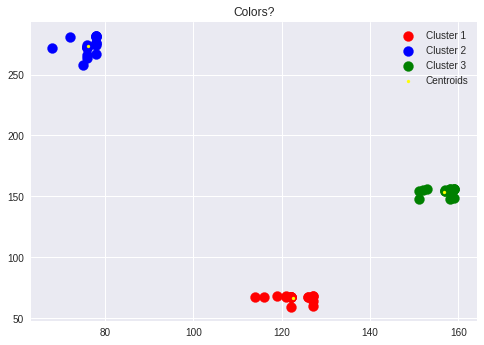

In [5]:
# Visualising the clusters
#plt.scatter(X[:, 0], X[:, 1], s = 100, c = 'red', label = 'Data')

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 9, c = 'yellow', label = 'Centroids')
plt.title('Colors?')

plt.legend()
plt.show()

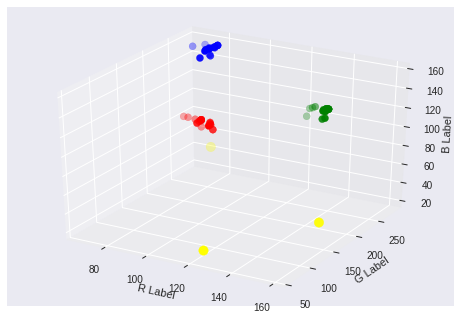

In [6]:
# tentando plotar em 3D

# criando um espaço 3D
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],X[y_kmeans == 2, 1], s = 50, c = 'red', label = 'Cluster 1')
ax.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],X[y_kmeans == 2, 1], s = 50, c = 'blue', label = 'Cluster 2')
ax.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],kmeans.cluster_centers_[:, 2], s = 90, c = 'yellow', label = 'Centroids')

ax.set_xlabel('R Label')
ax.set_ylabel('G Label')
ax.set_zlabel('B Label')

plt.show()